<a href="https://colab.research.google.com/github/crispianm/MDM3-UKCRIC/blob/main/TestingDNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
import pandas as pd
import os 
import sys
from sklearn.model_selection import train_test_split

In [12]:
#file = open('SingleSidedAmplitudeSpectrum_labelled.csv')
#file = open('LabelledMatrixTimeDomain.csv')

data = pd.read_csv("./data.csv")

training_set, test_set, training_labels, test_labels = train_test_split(data[:,3:], data[:,0], test_size=0.25, random_state=42)

print(data.shape)
# training_set = data[0:1991,3:]
# test_set = data[1992:2845,3:]
print(training_set[1,:])
# training_labels = data[0:1991,0]
# test_labels = data[1992:2845,0]
num_classes = len(np.unique(training_labels))
print(num_classes)

(10672, 14)
[ 2.03499434e-03  2.72754272e-03  9.53857600e-03 -6.65941870e-03
  4.68976818e+00  5.39893309e-01  7.38245507e-06  3.31322619e-03
  2.03241884e-03  9.58688133e-05  9.58688133e-05]
4


In [13]:
training_labels_categorical = to_categorical(training_labels)
test_labels_categorical = to_categorical(test_labels)
print(training_labels_categorical[0])

[1. 0. 0. 0.]


In [22]:
model = Sequential()
num_features = training_set.shape[1]
model.add(Dense(128, input_dim = num_features, activation='relu'))
model.add(Dense(64, activation='relu'))

# model.add(Conv1D(filters=32, kernel_size=5, padding='same', activation='relu', input_dim = num_features))
# model.add(MaxPooling1D(pool_size=2))

# model.add(Conv1D(filters=64, kernel_size=5, padding='same', activation='relu', input_dim = num_features))
# model.add(MaxPooling1D(pool_size=2))


model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate = 0.001), metrics=['accuracy'])

history = model.fit(training_set, training_labels_categorical, epochs=20) 

Epoch 1/20
224/224 [==============================] - 1s 4ms/step - loss: 0.7293 - accuracy: 0.7253
Epoch 2/20
224/224 [==============================] - 1s 4ms/step - loss: 0.5795 - accuracy: 0.7594
Epoch 3/20
224/224 [==============================] - 1s 3ms/step - loss: 0.5499 - accuracy: 0.7698
Epoch 4/20
224/224 [==============================] - 1s 3ms/step - loss: 0.5303 - accuracy: 0.7848
Epoch 5/20
224/224 [==============================] - 1s 4ms/step - loss: 0.5148 - accuracy: 0.7971
Epoch 6/20
224/224 [==============================] - 1s 4ms/step - loss: 0.5036 - accuracy: 0.8025
Epoch 7/20
224/224 [==============================] - 1s 3ms/step - loss: 0.4999 - accuracy: 0.8063
Epoch 8/20
224/224 [==============================] - 1s 4ms/step - loss: 0.4971 - accuracy: 0.8062
Epoch 9/20
224/224 [==============================] - 1s 4ms/step - loss: 0.4931 - accuracy: 0.8041
Epoch 10/20
224/224 [==============================] - 1s 4ms/step - loss: 0.4943 - accuracy: 0.8064

In [23]:
loss, accuracy = model.evaluate(test_set, test_labels_categorical)

111/111 [==============================] - 0s 3ms/step - loss: 0.5374 - accuracy: 0.7817


Text(0, 0.5, 'loss')

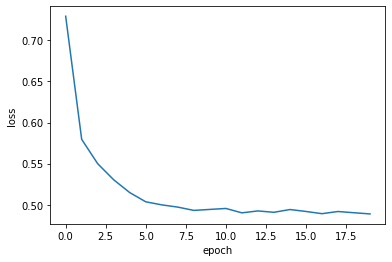

In [24]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')